In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8883 - loss: 0.3888 - val_accuracy: 0.9696 - val_loss: 0.0983
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9730 - loss: 0.0883 - val_accuracy: 0.9728 - val_loss: 0.0829
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9817 - loss: 0.0583 - val_accuracy: 0.9757 - val_loss: 0.0753
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9885 - loss: 0.0373 - val_accuracy: 0.9767 - val_loss: 0.0746
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.9761 - val_loss: 0.0742
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9911 - loss: 0.0258 - val_accuracy: 0.9763 - val_loss: 0.0821
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9927 - loss: 0.0212 - val_accuracy: 0.9778 - val_loss: 0.0827
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9944 - loss: 0.0167 - 

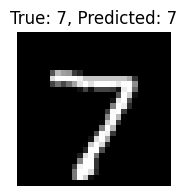

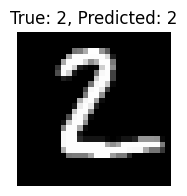

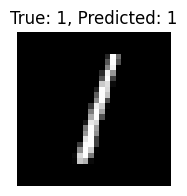

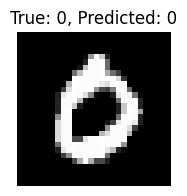

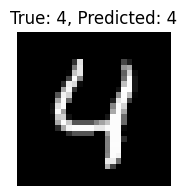

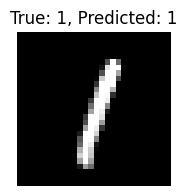

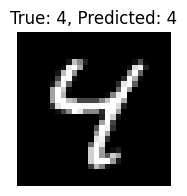

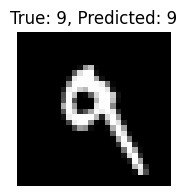

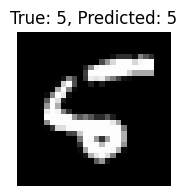

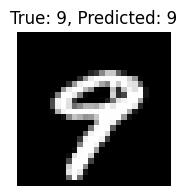

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=50, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Predict on a few test samples
num_samples = 10
predictions = model.predict(x_test[:num_samples])

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the images with their predicted and true labels
for i in range(num_samples):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()
